In [1]:
import cv2 as cv 
import numpy as np
import scipy
# from  PIL import Image,ImageEnhance
import math
from skimage import data, exposure, io  #调暗
import time
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
%load_ext autoreload
%autoreload 2
from data.tool import show_paf

(1000, 670, 3)


[0.30720000000000003, 0.384, 0.576, 0.768]

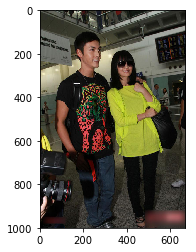

In [2]:
# 4c603e0bdf5bb37e665ecbf30cd627504b62a03d  0088378fe2de1da7f0e4f3df1b874b5c260e8218
test_image = '/data/image/ai_cha/old_del/ai_challenger_keypoint_validation_20170911/keypoint_validation_images_20170911/'
test_image += '0002605c53fb92109a3f2de4fc3ce06425c3b61f.jpg'
file_name=test_image.split('/')[-1][:-4]
oriImg = cv.imread(test_image) # B,G,R order
print (oriImg.shape)
f = plt.imshow(oriImg[:,:,[2,1,0]]) # reorder it before displaying
model={'boxsize':384}
model['stride'] = 8
param={}
param['scale_search'] = [0.8,1,1.5,2] # 多尺度搜索
multiplier = [x * model['boxsize']*1.0 / oriImg.shape[0] for x in param['scale_search']]
multiplier

In [3]:
import torch
import torch as t
import torchvision
import sys
from config  import opt
from models import KeypointModel as pose_model
from utils.test_tool import *
pose_model=pose_model(opt).cuda(1).eval()
pose_model.load('checkpoints/KeypointModel_1030_0332_0.0100910376112.pth')
pose_model.cuda()
print 'load success'

old config：
{'shuffle': True, 'lr1': 0, 'decay_every': 1500, 'lr2': 0.001, 'anno_path': '/data_ssd/ai_challenger/ai_challenger_keypoint_train_20170909/train.pth', 'max_epoch': 100, 'submit': 'result/val_result.json', 'downsample_rate': 8, 'env': 'keypoint', 'ref': '/mnt/6/ai_challenger_keypoint_validation_20170911/keypoint_validation_annotations_20170911.json', 'num_workers': 10, 'plot_every': 100, 'batch_size': 32, 'boxsize': 384, 'seg_debug_file': '/tmp/debugk', 'save_every': 3000, 'img_root': '/data_ssd/ai_challenger/ai_challenger_keypoint_train_20170909/keypoint_train_images_20170902/', 'crop_size_x': 384, 'crop_size_y': 384, 'scale_search': [1.0], 'val_dir': '/mnt/6/ai_challenger_keypoint_validation_20170911/keypoint_validation_images_20170911/', 'val_result_dir': '/home/x/dcsb/KeyPoint/result/', 'stride': 8, 'model_path': None, 'thre1': 0.1, 'model': 'KeypointModel', 'sigma': 1.0, 'thre2': 0.05}
load success


In [4]:
heatmap_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 15))
paf_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 26))
for scale in multiplier:
    (heatmap1,heatmap2),(paf1,paf2) = get_output(pose_model,scale,oriImg,model['stride'])
    heatmap = flip_heatmap(heatmap1,heatmap2)
    paf = flip_paf(paf1,paf2)
    heatmap_avg += heatmap
    paf_avg += paf

heatmap_avg /= len(multiplier)
paf_avg /= len(multiplier)

/home/a/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


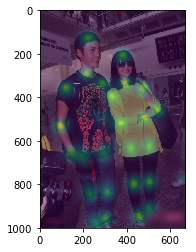

In [5]:
f = plt.figure()
plt.imshow(oriImg[:,:,[2,1,0]])
ax2 = plt.imshow(heatmap_avg[:,:,14], alpha=.5)
f.show()

/home/a/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


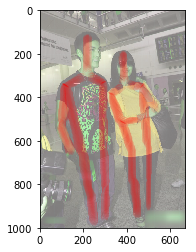

In [6]:
img = oriImg[:,:,[1,2,0]]
show_paf(img,paf_avg.clip(min=-1,max=1))

In [11]:
len(all_peaks)

14

In [24]:
all_peaks

[[(119, 355, 0.71655809879302979, 0), (330, 393, 0.71109861135482788, 1)],
 [(372, 519, 0.73148822784423828, 2), (94, 530, 0.803802490234375, 3)],
 [(480, 490, 0.68590277433395386, 4),
  (143, 653, 0.65242397785186768, 5),
  (144, 654, 0.6515948548913002, 6)],
 [(288, 334, 0.67140065133571625, 7), (469, 349, 0.65836207568645477, 8)],
 [(537, 459, 0.68487603962421417, 9), (302, 490, 0.24513562023639679, 10)],
 [(469, 375, 0.19847247190773487, 11),
  (487, 491, 0.17584219435229897, 12),
  (324, 609, 0.17401319775672164, 13)],
 [(418, 633, 0.61004918813705444, 14), (201, 668, 0.45350239053368568, 15)],
 [(431, 797, 0.7390468567609787, 16), (231, 844, 0.54506713151931763, 17)],
 [(662, 773, 0.19774086773395538, 18),
  (453, 943, 0.78275477886199951, 19),
  (256, 980, 0.52652041986584663, 20)],
 [(501, 624, 0.60688695311546326, 21), (291, 656, 0.50874935835599899, 22)],
 [(502, 787, 0.67614084482192993, 23), (307, 835, 0.64784497022628784, 24)],
 [(661, 774, 0.16130693443119526, 25),
  (500

In [23]:
connection_all#.shape

[array([[ 29.        ,  31.        ,   0.64789897,   1.        ,   1.        ],
        [ 28.        ,  30.        ,   0.5712415 ,   0.        ,   0.        ]]),
 array([[  0.        ,  30.        ,   0.59599264,   0.        ,   0.        ],
        [  1.        ,  31.        ,   0.4747194 ,   1.        ,   1.        ]]),
 array([[  7.        ,  30.        ,   0.71051716,   0.        ,   0.        ],
        [  8.        ,  31.        ,   0.64263552,   1.        ,   1.        ]]),
 array([[ 0.        ,  3.        ,  0.69151144,  0.        ,  1.        ],
        [ 1.        ,  2.        ,  0.38774047,  1.        ,  0.        ]]),
 array([[ 3.        ,  5.        ,  0.81102365,  1.        ,  1.        ],
        [ 2.        ,  4.        ,  0.62971754,  0.        ,  0.        ]]),
 array([[  8.        ,   9.        ,   0.58312495,   1.        ,   0.        ],
        [  7.        ,  10.        ,   0.32187954,   0.        ,   1.        ]]),
 array([[  9.        ,  12.        ,   0.1887650

In [7]:
all_peaks,peak_counter = find_peaks(heatmap_avg,0.1)

In [14]:
special_k,connection_al


In [27]:
candidate.shape

(32, 4)

In [31]:
connection_all

[array([[ 29.        ,  31.        ,   0.64789897,   1.        ,   1.        ],
        [ 28.        ,  30.        ,   0.5712415 ,   0.        ,   0.        ]]),
 array([[  0.        ,  30.        ,   0.59599264,   0.        ,   0.        ],
        [  1.        ,  31.        ,   0.4747194 ,   1.        ,   1.        ]]),
 array([[  7.        ,  30.        ,   0.71051716,   0.        ,   0.        ],
        [  8.        ,  31.        ,   0.64263552,   1.        ,   1.        ]]),
 array([[ 0.        ,  3.        ,  0.69151144,  0.        ,  1.        ],
        [ 1.        ,  2.        ,  0.38774047,  1.        ,  0.        ]]),
 array([[ 3.        ,  5.        ,  0.81102365,  1.        ,  1.        ],
        [ 2.        ,  4.        ,  0.62971754,  0.        ,  0.        ]]),
 array([[  8.        ,   9.        ,   0.58312495,   1.        ,   0.        ],
        [  7.        ,  10.        ,   0.32187954,   0.        ,   1.        ]]),
 array([[  9.        ,  12.        ,   0.1887650

In [ ]:
ls

In [30]:
subset

array([[  1.        ,   2.        ,   4.        ,   8.        ,
          9.        ,  12.        ,  14.        ,  16.        ,
         19.        ,  21.        ,  23.        ,  26.        ,
         29.        ,  31.        ,  16.69380076,  14.        ],
       [  0.        ,   3.        ,   5.        ,   7.        ,
         10.        ,  13.        ,  15.        ,  17.        ,
         20.        ,  22.        ,  24.        ,  27.        ,
         28.        ,  30.        ,  15.71214976,  14.        ]])

In [25]:
subset,candidate = find_person(all_peaks,special_k,connection_all)

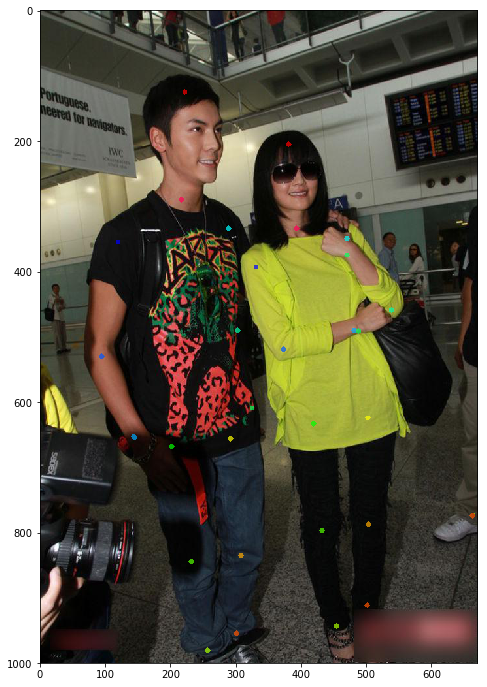

In [79]:
# visualize
import matplotlib
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255]]

cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv.imread(test_image) # B,G,R order

for i in range(14):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv.circle(canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

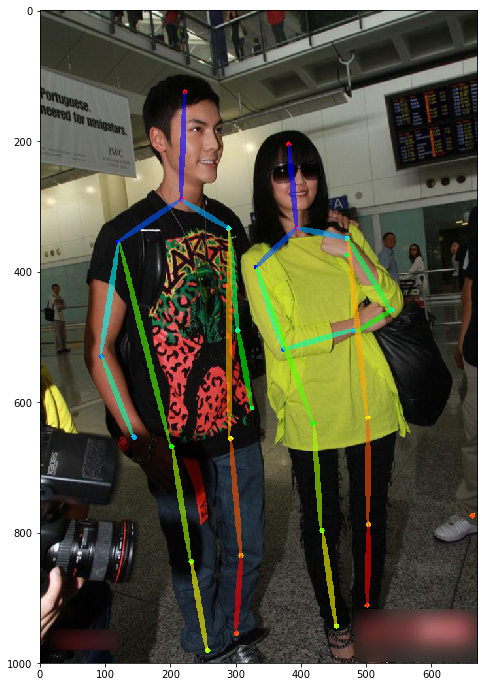

In [80]:
# visualize 2
stickwidth = 4
limbSeq = [[13,14], [1,14], [4,14], [1,2], [2,3], [4,5], [5,6], [1,7], \
           [7,8], [8,9], [4,10], [10,11], [11,12]]
for i in range(13):
    for n in range(len(subset)):
        index = subset[n][np.array(limbSeq[i])-1]
        if -1 in index:
            continue
        cur_canvas = canvas.copy()
        Y = candidate[index.astype(int), 0]
        X = candidate[index.astype(int), 1]
        mX = np.mean(X)
        mY = np.mean(Y)
        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
        cv.fillConvexPoly(cur_canvas, polygon, colors[i])
        canvas = cv.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
        
plt.imshow(canvas[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)